

<img src="https://saas.ulb.ac.be/wp-content/uploads/2016/09/logo_ulb.png" alt="Drawing" width="300"/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# INFO-F422 Statistical Foundations for Machine Learning - Regression algorithms

<br>
<br>
<br>
<br>
<br>
<br>
    
**Name**: Erick Escobar Gallardo


**Student-code**: 000489309

**University**: ULB


# **Regression - Real datasets**
## An Exploratory Data Analysis (EDA) and comparisson of outliers detection methods and its impact on regression methods on the  Insurance Cost Dataset
---
<table>
  <tr>
    <th></th>
    <th>Regression</th>
    <th>Real Dataset</th>
    <th>Synthetic Dataset</th>
  </tr>
  <tr>
    <td>1.</td>
    <td>Support Vector Machines (SVM)</td>
    <td> Insurance Cost dataset</td>
    <td>Synthetic data</td>
  </tr>
  <tr>
    <td>2.</td>
    <td>Naive Bayes</td>
    <td> Insurance Cost dataset<br></td>
    <td>Synthetic data</td>
  </tr>

</table>

Dataset description: This dataset is used for Insurance Forecast  using regressions. The dataset contains 8 columns:

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance



## Modules Loading

In [69]:
#Common libs
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math
import helper
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

## Data Preparation and EDA

This section analyzes the _Medical Insurance Cost Personal_ dataset obtained from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

In [70]:
df = pd.read_csv("Datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We are going to __perform exploratory data analysis (EDA)__ to analyze the dataset and  summarize their main characteristics with visual methods. 

The describe function from pandas allows us to see descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN( member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable) values.

The result’s index  includes count, mean, std, min, max as well as 25, 50 and 75 percentiles.

In [72]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The next step is to search if we have NaN values on the dataset. For this, we are going to use the isnull() function that checks all the values on the dataset and returns true if the value is considered NaN, this function in conjuction with sum returns us the quantity of NaN values. This dataset contains no NaN values.

In [73]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since we are going to predict the total costs of insurance and  see what  fields are more correlated with the charges. 
We need to encode categorical features and represent them by a numerical datatype, this is achieved with the help of the sub library LabelEncoder from sklearn. 3 features need to be encoded: sex, smoker, and region.

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

As we can see in the following representation of the head's table, the values of sex, smoker and region had been chandged according to:
1. sex: Male=1, Female=0
2. smoker: True=1, false=0
3. region: southwest=3, southeast=2,northwest=1,northeast=0

In [75]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NaN values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. 

__Correlation analysis__ is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related.

We make the analysis of correlation of all the variables against our target, that is charges.

In [76]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

The correlation of a variable with itself is 1. For that reason all the diagonal values are 1.00, besides that we observe a strong correlation just between the values of charges and smoker.

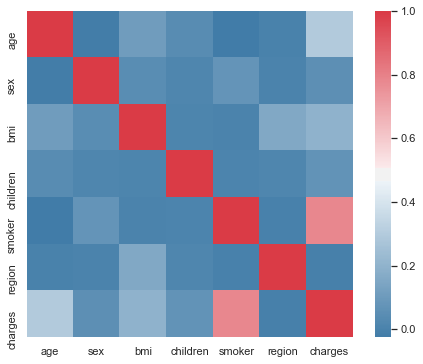

In [77]:
f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Next we plot the distribution of charges,we can see the range of how much patients spend on medical charges. Normally the distribution of the target values allows us to see if there exist ouliers with a visual method. In this case, the long tail tell us that there might exist outliers. 

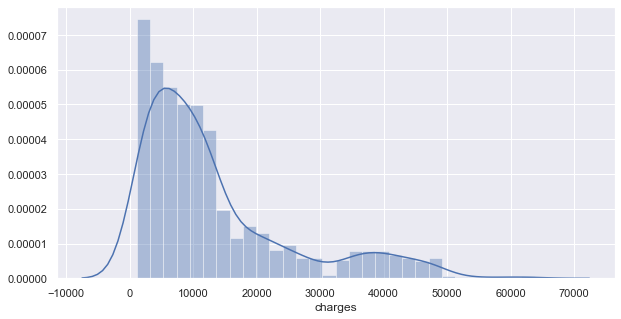

In [78]:
plt.figure(figsize = (10,5))
sns.distplot(df['charges'])

We are going to explore more the strong correlation of the smoker status and the total amount of medical charges

Text(0.5, 1.0, 'Distribution of medical charges for non-smokers')

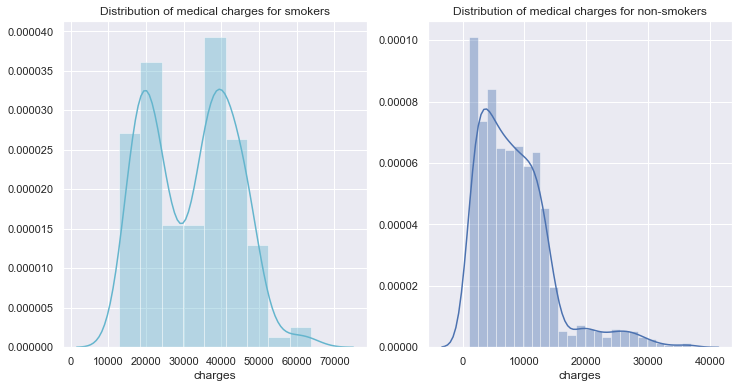

In [79]:
f= plt.figure(figsize=(12,6))

ax=f.add_subplot(1,2,1)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of medical charges for smokers')

ax=f.add_subplot(1,2,2)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of medical charges for non-smokers')

As expected, smoker patients pay more in average for the medical insurance than non smoker patients. We can also see in the following plot that the number of non smokers are more than the number of smokers, and that is true for both sex (male and female). Let's remember that: Male=1, Female=0.

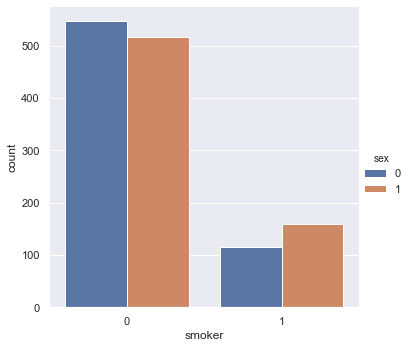

In [80]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)

In the following plot we can see the distribution of charges for the smoker and non smoker people reagarding its sex. Smokers pay a lot more than non smokers.

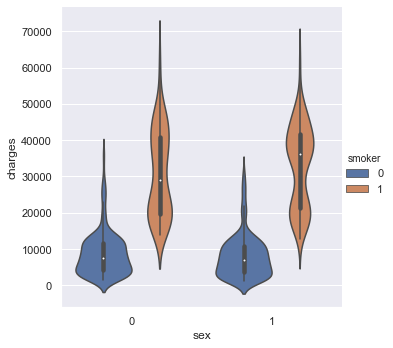

In [81]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df)

On the following graph we can observe that the medical charges increases in proportion with the age of the person and that is true for smoker and non smokers but we can see that the charges and the age of person are really dependant in the case of non smokers.

Text(0.5, 1, 'Smokers and non-smokers')

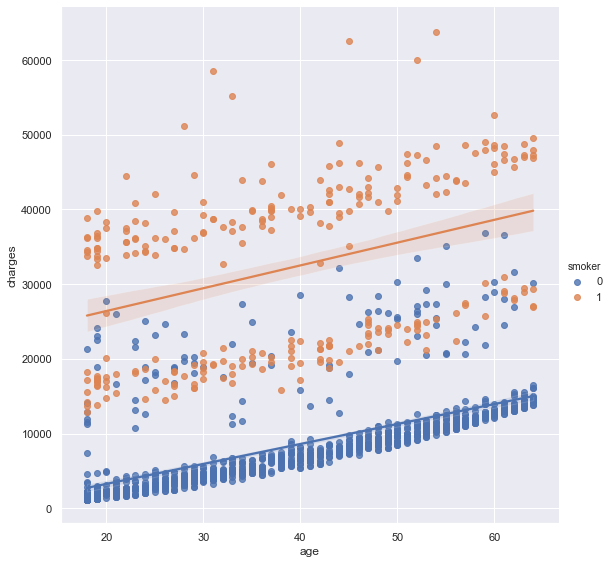

In [82]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df,height=8)
ax.set_title('Smokers and non-smokers')

## Outliers Analysis

An outlier is a data point that differs significantly from other observations.A data point that is rare, or distinct, or does not fit in some way is called an outlier or a data anomaly.

The causes for the existence of an outlier are:

* Data entry errors or human errors
* Measurement errors 
* Intentional (useful for analysis on synthetic data)
* Sampling errors (extracting or mixing data from wrong or various sources)
* Natural (not an error, novelties in data)

We can use statistical methods to identify outliers in the given data of analysis.But because of the natural cause of existence of an outlier, we cannot remove all the values identified as outliers. Plotting the identified outlier values, in the context of non-outlier values is useful to see if there are any systematic relationships or correlations. 

Outlier can be of two types:
1. Univariate: Univariate outliers can be found when looking at a distribution of values in a single feature space.
2. Multivariate: ultivariate outliers can be found in a n-dimensional space (of n-features).

## 1) Univariate outliers

### A) Interquartile Range Method

Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.

<div>
<img src="Images/boxplot4.bmp" width="500"/>
</div>

IQR can be defined as the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

<div>
<img src="Images/boxplot5.png" width="500"/>
</div>

Let's first find if there is any univariate outlier, we are going to use the boxplot function of the sns library.

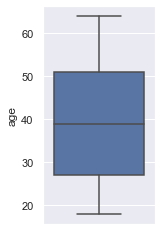

In [83]:
plt.figure(figsize = (2,4))
sns.boxplot(y = df.age)

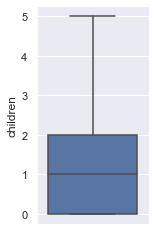

In [84]:
plt.figure(figsize = (2,4))
sns.boxplot(y = df.children)

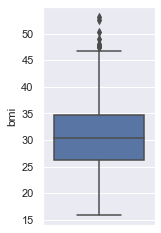

In [85]:
plt.figure(figsize = (2,4))
sns.boxplot(y = df.bmi)

From all the box plots, we can see that there are outliers on the bmi column values. From here we can determine the IQR and the lower and upper bounds to get the exact number of outliers in the bmi column.

In [86]:
lower,upper=helper.out_iqr(df,'bmi')

The IQR is 8.3975
The lower bound value is 13.7
The upper bound value is 47.290000000000006
Total number of outliers are 9


We can obtain a graphical representation by using the the distplot function of sns, the red bars represent the outliers zone.

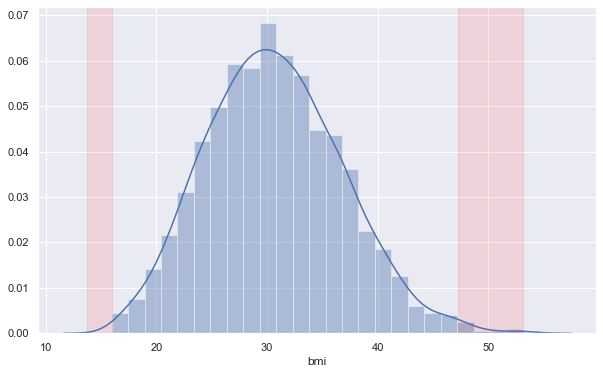

In [87]:
plt.figure(figsize = (10,6))
sns.distplot(df.bmi, kde=True)
plt.axvspan(xmin = lower,xmax= df.bmi.min(),alpha=0.1, color='red')
plt.axvspan(xmin = upper,xmax= df.bmi.max(),alpha=0.1, color='red')

### A) Z-Score Method

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. Z-score gives you an idea of how far from the mean a data point is

By calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. For this, we need to use a threshold to determine which values are really far away from zero, in most of the cases a threshold of 3 or -3 is used, if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

Formula for Z score = (Observation — Mean)/Standard Deviation.

This technique assumes that we have Gaussian distribution on the data. The outliers are then, the data points that are in the tails of the distribution and distant from the mean.

$\mathbf{z}=(\mathbf{X}-\boldsymbol{\mu}) / \boldsymbol{\sigma}$

Let's check again the distribution of charges, we can see that the right tail is long, and that denotes the pressence of outliers.

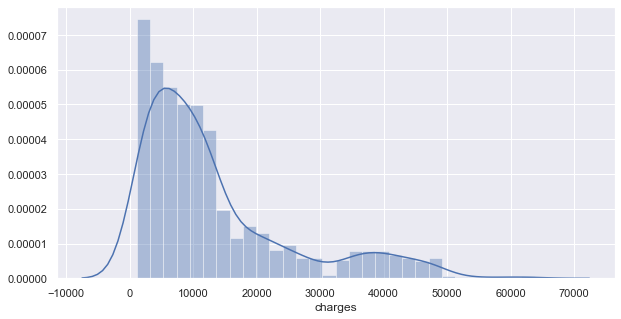

In [88]:
plt.figure(figsize = (10,5))
sns.distplot(df['charges'])

In [89]:
zscore,outliers = helper.out_zscore(df.charges)

Total number of outliers are 7


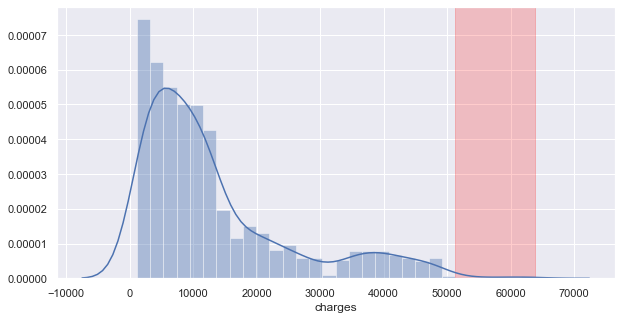

In [90]:
plt.figure(figsize = (10,5))
sns.distplot(df['charges'])
plt.axvspan(xmin = min(zscore) ,xmax= max(zscore),alpha=0.2, color='red')

## 2) Multivariate outliers

### A) DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Charges and age

In [91]:
X = df[['charges','age']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [92]:
pd.Series(labels).value_counts()

-1    1338
dtype: int64

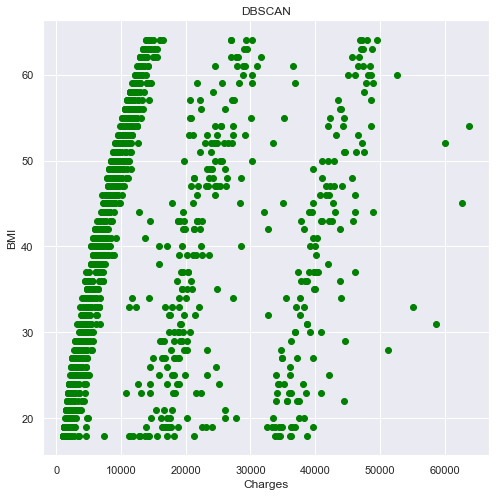

In [93]:
plt.figure(figsize=(8,8))

unique_labels = set(labels)
colors = ['green', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.title("DBSCAN")
plt.xlabel('Charges');
plt.ylabel('BMI');

Age and BMI

In [94]:
X = df[['age','bmi']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_
pd.Series(labels).value_counts()

 0    1312
-1      26
dtype: int64

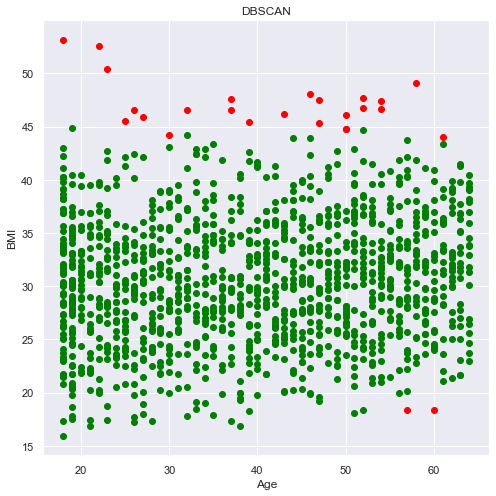

In [95]:
plt.figure(figsize=(8,8))

unique_labels = set(labels)
colors = ['green', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.title("DBSCAN")
plt.xlabel('Age');
plt.ylabel('BMI');

### B) Local Outlier Factor Method(LOF):

Charges and age

In [96]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df[['charges','age']].values
y_pred = clf.fit_predict(X)

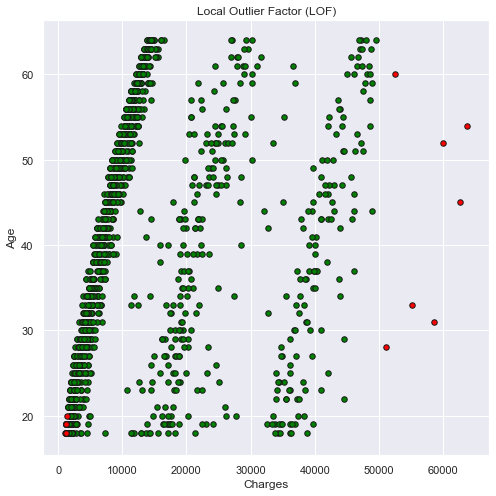

In [97]:
plt.figure(figsize=(8,8))


in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'green',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Charges');
plt.ylabel('Age');
plt.show()

Age and BMI

In [98]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df[['age','bmi']].values
y_pred = clf.fit_predict(X)

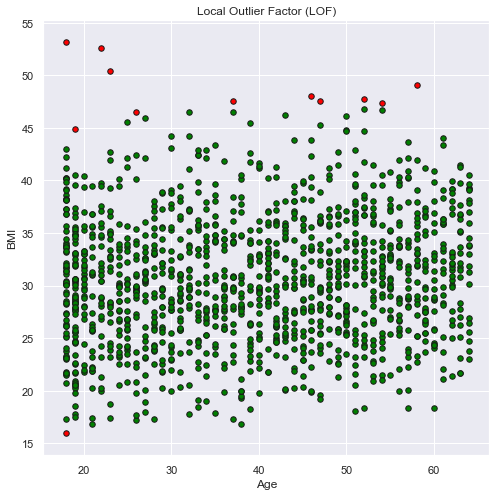

In [99]:
plt.figure(figsize=(8,8))


in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'green',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('BMI');
plt.show()

## Least Squares Linear Regression Model


In mathematical notation, if is $\hat{y}$ the predicted value.

$\hat{y}(w, x)=w_{0}+w_{1} x_{1}+\ldots+w_{p} x_{p}$

Least Squares is a standard approach in regression analysis to approximate the solution of overdetermined systems, it fits a linear model with coefficients $w=\left(w_{1}, \ldots, w_{p}\right)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 

Mathematically it solves a problem of the form:

$\min _{w}\|X w-y\|_{2}^{2}$

## RandomForestRegressor

The random forest model is a type of additive model that makes predictions by combining decisions from a sequence of base models. More formally we can write this class of models as:

$g(x)=f_{0}(x)+f_{1}(x)+f_{2}(x)+\ldots$

where the final model $g$ is the sum of simple base models $f_{i}$.  Here, each base classifier is a simple decision tree. This broad technique of using multiple models to obtain better predictive performance is called model ensembling. In random forests, all the base models are constructed independently using a different subsample of the data.

An input parameter to the function is the number of trees in the forest (n_estimators), we are going to use a value of 10 estimators.

In [100]:
X = df.iloc[: , 1:6]
y =  df.iloc[: , 6]

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [102]:
reg1 = RandomForestRegressor(random_state=1, n_estimators=10)
reg2 = LinearRegression()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

The next plot compares the individual predictors, we can see a comparisson of the predicted value of the random forest regressor, the linear regressor and the real value.

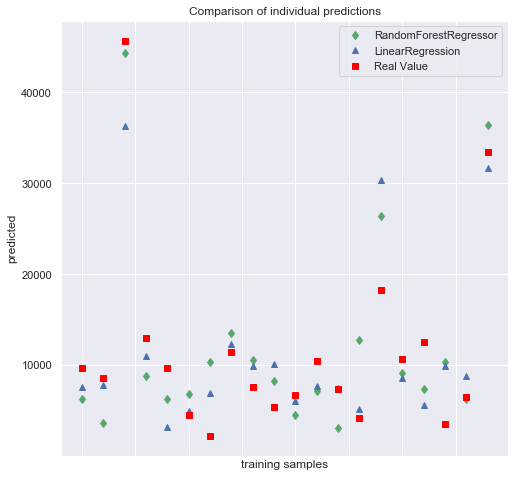

In [103]:

xt = X_test[:20]
yt = y_test[:20].to_numpy()
plt.figure(figsize=(8,8))
plt.plot(reg1.predict(xt), 'gd', label='RandomForestRegressor')
plt.plot(reg2.predict(xt), 'b^', label='LinearRegression')
#plt.plot(reg3.predict(xt), 'r*', label='GradientBoostingRegressor')
plt.plot(yt, 'ys', label='Real Value',color="red")
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions')
plt.show()

The next thing to perform is to analyze our prediction models. We are going to use 2 metrics to evaluate the models 
performance.

__Mean squared error__

 MSE is a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

__$\mathrm{R}^{2}$ score, the coefficient of determination__

The $R^2$ score function computes the coefficient of determination, usually denoted as $R^{2}$. It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

In [104]:
from sklearn.metrics import mean_squared_error,r2_score
print("RandomForestRegressor:")
y_pred1 = reg1.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred1, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred1))

RandomForestRegressor:
Mean squared error: 6588.57
Coefficient of determination: 0.72


In [105]:

y_pred2 = reg2.predict(X_test)
print("LinearRegression:")
print('Coefficients: \n', reg2.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred2, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred2))

LinearRegression:
Coefficients: 
 [  -82.11810994   388.97320684   646.81779081 23133.8242426
  -487.45987123]
Mean squared error: 6875.30
Coefficient of determination: 0.70


We can see that the random forest regressor with has the lowest MSE and the highest coefficient of determination that makes the best preditor model for the dataset.
We are going to employ another library called statmodels to perform the least squares linear regression, and the compare the results to the previous models, one important feature of this library is that it gives us a detailed information about calculated model.

In [106]:

import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              1054.
Date:                Tue, 12 May 2020   Prob (F-statistic):                        0.00
Time:                        22:58:32   Log-Likelihood:                         -10319.
No. Observations:                1003   AIC:                                  2.065e+04
Df Residuals:                     998   BIC:                                  2.067e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex         -272.8006    446.560     -0.611      0.541   -1149.106     603.505
bmi          296.0512     15.427     19.191      0.000     265.779     326.324
children     571.6596    184.802      3.093      0.002     209.014     934.305
smoker      2.298e+04    559.283     41.086      0.000    2.19e+04    2.41e+04
region      -567.4803    204.038     -2.781      0.006    -967.873    -167.088
==============================================================================
Omnibus:                      149.025   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.822
Skew:                           0.937   Prob(JB):                     1.03e-56
Kurtosis:                       4.630   Cond. No.                         78.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are going to analyze again the correlation plot to decide which features we can drop to see if the model. Lets remember that a co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. A value of ± 1 indicates a perfect degree of association between the two variables. As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker. The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a - sign indicates a negative relationship.
The strongest correlation according to the next plot belongs to the smoker variable, and the weakest relations (closer to 0) are with children, region and sex. 

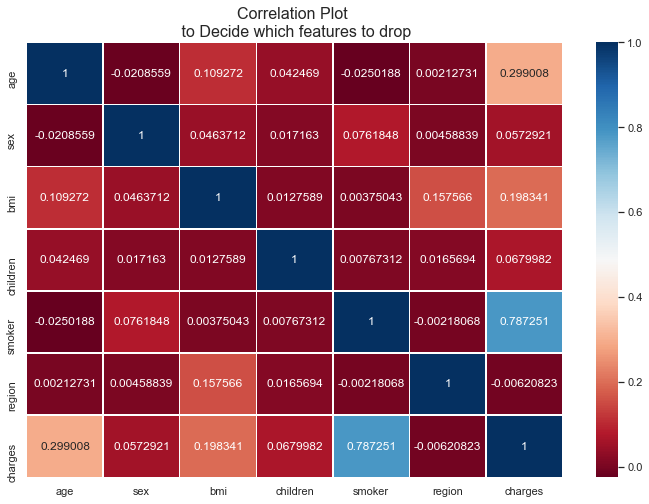

In [107]:
fig = plt.figure(figsize=(12,8))

corr = df.corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")
plt.title("Correlation Plot \n to Decide which features to drop", fontsize=16)
plt.show()

We are going to drop the weakest  of all the correlations, and it's between charges and region.

In [108]:
df_drop1 = df.drop(['region'], axis=1, inplace=False)

In [111]:
X1 = df_drop1.iloc[: , 1:5]
y1 =  df_drop1.iloc[: , 5]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,random_state = 0,test_size=0.25)

In [112]:
reg1_m = RandomForestRegressor(random_state=1, n_estimators=10)
reg2_m = LinearRegression()

reg1_m.fit(X1_train, y1_train)
reg2_m.fit(X1_train, y1_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
print("RandomForestRegressor:")
y1_pred1 = reg1_m.predict(X1_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred1, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred1))

RandomForestRegressor:
Mean squared error: 6599.02
Coefficient of determination: 0.72


In [114]:

y1_pred2 = reg2_m.predict(X1_test)
print("LinearRegression:")

print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred2, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred2))

LinearRegression:
Mean squared error: 6866.93
Coefficient of determination: 0.70


We can see from the outputs that dropping the feature 'region' does not make any signifficant changes in the result mean squared error and the coefficient of determination, but reduces our models complexity, which is good since we want to keep a simple and accurate regressor.

## Conclussions

### References

1. https://www.kaggle.com/mirichoi0218/insurance
2. https://www.statisticshowto.com/probability-and-statistics/correlation-analysis/
3. https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
4. https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561
4. https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404
5. https://turi.com/learn/userguide/supervised-learning/random_forest_regression.html

# **Regression - Syntetic datasets**

In [19]:
def symbolize(s):
    """
    Converts a a string (equation) to a SymPy symbol object
    """
    from sympy import sympify
    s1=s.replace('.','*')
    s2=s1.replace('^','**')
    s3=sympify(s2)
    
    return(s3)

In [20]:
def eval_multinomial(s,vals=None,symbolic_eval=False):
    """
    Evaluates polynomial at vals.
    vals can be simple list, dictionary, or tuple of values.
    vals can also contain symbols instead of real values provided those symbols have been declared before using SymPy
    """
    from sympy import Symbol
    sym_s=symbolize(s)
    sym_set=sym_s.atoms(Symbol)
    sym_lst=[]
    for s in sym_set:
        sym_lst.append(str(s))
    sym_lst.sort()
    if symbolic_eval==False and len(sym_set)!=len(vals):
        print("Length of the input values did not match number of variables and symbolic evaluation is not selected")
        return None
    else:
        if type(vals)==list:
            sub=list(zip(sym_lst,vals))
        elif type(vals)==dict:
            l=list(vals.keys())
            l.sort()
            lst=[]
            for i in l:
                lst.append(vals[i])
            sub=list(zip(sym_lst,lst))
        elif type(vals)==tuple:
            sub=list(zip(sym_lst,list(vals)))
        result=sym_s.subs(sub)
    
    return result

In [21]:
def gen_regression_symbolic(m=None,n_samples=100,n_features=2,noise=0.0,noise_dist='normal'):
    """
    Generates regression sample based on a symbolic expression. Calculates the output of the symbolic expression 
    at randomly generated (drawn from a Gaussian distribution) points
    m: The symbolic expression. Needs x1, x2, etc as variables and regular python arithmatic symbols to be used.
    n_samples: Number of samples to be generated
    n_features: Number of variables. This is automatically inferred from the symbolic expression. So this is ignored 
                in case a symbolic expression is supplied. However if no symbolic expression is supplied then a 
                default simple polynomial can be invoked to generate regression samples with n_features.
    noise: Magnitude of Gaussian noise to be introduced (added to the output).
    noise_dist: Type of the probability distribution of the noise signal. 
    Currently supports: Normal, Uniform, t, Beta, Gamma, Poission, Laplace

    Returns a numpy ndarray with dimension (n_samples,n_features+1). Last column is the response vector.
    """
    
    import numpy as np
    from sympy import Symbol,sympify
    
    if m==None:
        m=''
        for i in range(1,n_features+1):
            c='x'+str(i)
            c+=np.random.choice(['+','-'],p=[0.5,0.5])
            m+=c
        m=m[:-1]
    
    sym_m=sympify(m)
    n_features=len(sym_m.atoms(Symbol))
    evals=[]
    lst_features=[]
    
    for i in range(n_features):
        lst_features.append(np.random.normal(scale=5,size=n_samples))
    lst_features=np.array(lst_features)
    lst_features=lst_features.T
    lst_features=lst_features.reshape(n_samples,n_features)
    
    for i in range(n_samples):
        evals.append(eval_multinomial(m,vals=list(lst_features[i])))
    
    evals=np.array(evals)
    evals=evals.reshape(n_samples,1)
    
    if noise_dist=='normal':
        noise_sample=noise*np.random.normal(loc=0,scale=1.0,size=n_samples)
    elif noise_dist=='uniform':
        noise_sample=noise*np.random.uniform(low=0,high=1.0,size=n_samples)
    elif noise_dist=='beta':
        noise_sample=noise*np.random.beta(a=0.5,b=1.0,size=n_samples)
    elif noise_dist=='Gamma':
        noise_sample=noise*np.random.gamma(shape=1.0,scale=1.0,size=n_samples)
    elif noise_dist=='laplace':
        noise_sample=noise*np.random.laplace(loc=0.0,scale=1.0,size=n_samples)
        
    noise_sample=noise_sample.reshape(n_samples,1)
    evals=evals+noise_sample
        
    x=np.hstack((lst_features,evals))
    
    return (x)

In [54]:
from sklearn.datasets import make_regression

In [55]:
X, y, coef = make_regression(n_samples=1000, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

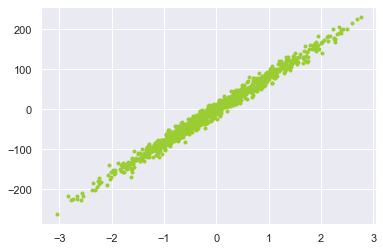

In [56]:
plt.scatter(X, y, color='yellowgreen', marker='.',
            label='Inliers')

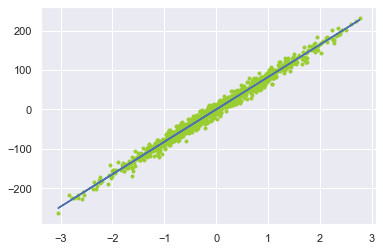

In [58]:
lin_reg.fit(X, y)
plt.plot(X, lin_reg.predict(X), color='b')
plt.scatter(X,y,color='yellowgreen', marker='.')

$1.7 x^{2}+1.5 x+9+f_{\text {noise}}(x | N=12)$

          0                 1
0 -0.116643  13.6219016989136
1   1.00281  21.3954495997647
2 -0.353151  6.42555720428522
3   3.13382  92.9778815335092
4   -1.2708  13.7082475533032
           0                 1
402 -17.1484  1984.07721192060
654 -15.5356  1623.79496128682
326  -14.611  1428.52829171809
821 -14.3799  1387.51755293734
944 -14.2963  1364.04123163666


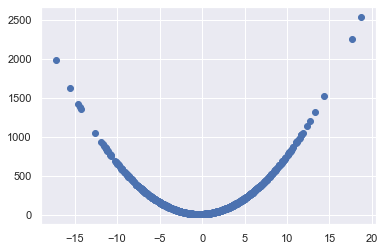

(1000, 1)
(1000,)


In [110]:
x=gen_regression_symbolic(m='1.7*x**2+1.5*x+9',n_samples=1000,noise=2)
df=pd.DataFrame(x)
print(df.head())
df = df.sort_values(df.columns[0]) 
print(df.head())
X= df.iloc[:, 0:1]
y= df.iloc[:, 1]
plt.scatter(X,y)
plt.show()
print(X.shape)
print(y.shape)

In [111]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

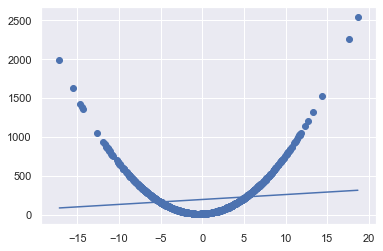

In [112]:
plt.plot(X, lin_reg.predict(X), color='b')
plt.scatter(X,y)

In [113]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=2)
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_2 = poly_reg_2.fit_transform(X)
X_poly_3 = poly_reg_3.fit_transform(X)


In [114]:
lin_reg_poly_2 = LinearRegression().fit(X_poly_2, y)
lin_reg_poly_3 = LinearRegression().fit(X_poly_3, y)

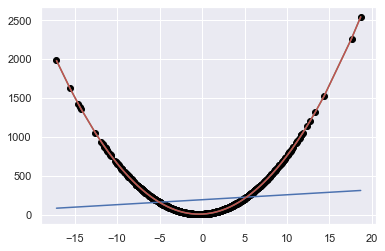

In [116]:
plt.scatter(X, y, color='black')
plt.plot(X, lin_reg.predict(X), color='b')
plt.plot(X, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X)), color='g')
plt.plot(X, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X)), color='r')
plt.show()